<a href="https://colab.research.google.com/github/AngelFA04/curso_estadistica_aplicada_py/blob/master/S21_Regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal

La regresión lineal es un modelo, algoritmo, o función matemática que aproxima de forma óptima la relación entre una variable $Y$ y una variable $X$ o un set de variables ($X_1, X_2, X_3,..., X_n$) utilizando la función de la recta, es decir, una linea.


 - **Función de la recta**: $Y = aX+b$, donde $a$ es la pendiente y $b$ el corte en el eje de las ordenadas.
 - **Función de regresión**: $Y = aX + b + error$, donde $X$ y $Y$ V.A, y $a$ y $b$ son los parametros poblacionales de la función que relaciona a $X$ y $Y$.

 El objetivo de un análisis de regresión es encontrar los mejores estimadores de $a$ y $b$ con el **mínimo error**

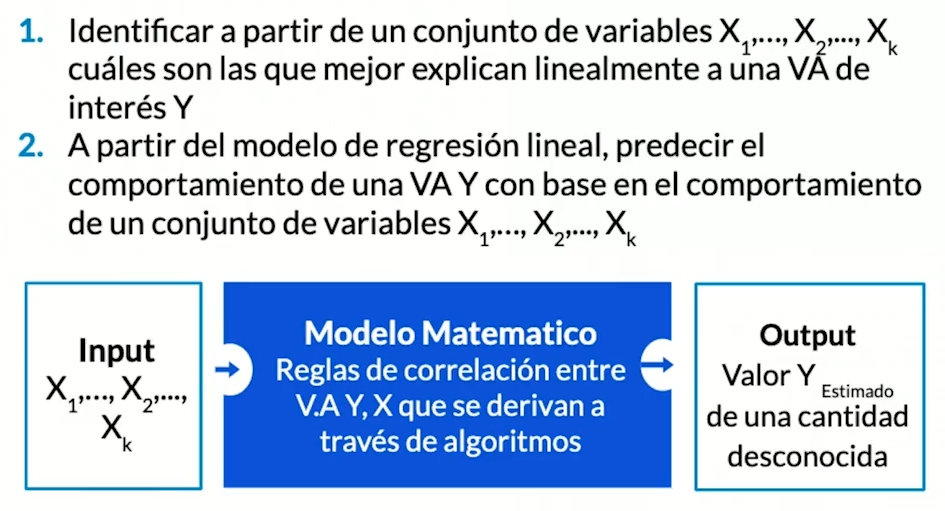

---

In [ ]:
!pip install pyreadstat

     |████████████████████████████████| 2.0MB 2.8MB/s 


In [ ]:
!wget https://static.platzi.com/media/tmp/class-files/git/fundamentos-estadistica-analisis-de-datos-python/fundamentos-estadistica-analisis-de-datos-python-20-regresion-lineal/compensacion-ejecutivos.sav

--2020-09-01 01:43:36--  https://static.platzi.com/media/tmp/class-files/git/fundamentos-estadistica-analisis-de-datos-python/fundamentos-estadistica-analisis-de-datos-python-20-regresion-lineal/compensacion-ejecutivos.sav
Resolving static.platzi.com (static.platzi.com)... 172.67.19.213, 104.20.18.218, 104.20.19.218, ...
Connecting to static.platzi.com (static.platzi.com)|172.67.19.213|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3121 (3.0K) [application/octet-stream]
Saving to: ‘compensacion-ejecutivos.sav’

compensacion-ejecut 100%[===================>]   3.05K  --.-KB/s    in 0s      

2020-09-01 01:43:36 (51.7 MB/s) - ‘compensacion-ejecutivos.sav’ saved [3121/3121]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import pyreadstat as pr

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

%matplotlib inline

In [ ]:
arc = 'compensacion-ejecutivos.sav'
df, meta = pr.read_sav(arc)
df.head()

,salario,noasiat,gpa,postgrad,experien
0,99026.0,0.0,3.36,0.0,15.0
1,69190.0,1.0,2.35,1.0,9.0
2,95453.0,1.0,3.33,1.0,10.0
3,57695.0,1.0,3.37,0.0,2.0
4,94364.0,1.0,3.87,1.0,4.0


A continuación se va a definir una variable dependiente $Y$ que será el salario para así analizar las relaciones que tiene con las otras variables.

In [ ]:
y = df['salario']
X = df.drop(['salario', 'postgrad', 'noasiat'], axis=1)

Se va a declarar el modelo de regresión lineal.

In [ ]:
reg_lin = sm.OLS( y, sm.add_constant(X) ).fit()

In [ ]:
print(reg_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     211.0
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           7.37e-38
Time:                        01:53:43   Log-Likelihood:                -1135.4
No. Observations:                 110   AIC:                             2277.
Df Residuals:                     107   BIC:                             2285.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4968.0099   4325.267      1.149      0.2

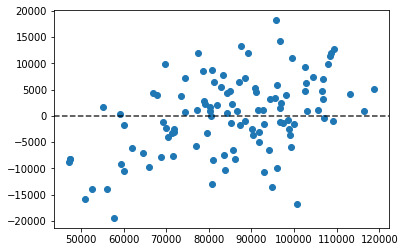

In [ ]:
fig, ax = plt.subplots()
#y estimado calculando la función de regresión
y_pred = reg_lin.predict(sm.add_constant(X))

ax.scatter( y, y-y_pred)
plt.axhline(y = 0, color='black', alpha=0.8, linestyle='--')

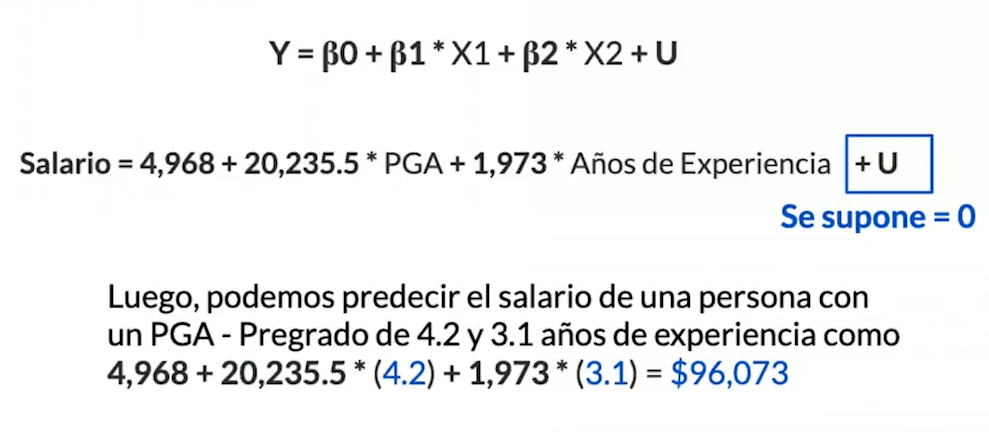